In [1]:
import numpy as np
import matplotlib.pyplot as plt

Statistiques
Erreur moyenne (L^2) : 1.2428e-01
Erreur moyenne (L^∞) : 5.9928e-03
minLinf = 0.0006514109984246367
maxLinf = 0.007608039038071301
minL2 = 0.005701872274668243
maxL2 = 0.15782093919590695

Erreur relative moyenne (L^2) : 2.8090e-04
Erreur relative moyenne (L^∞) : 6.8510e-04
minL2r = 1.933663902143779e-05
maxL2r = 0.00032501753348031356
minLinfr = 0.00011558692077725201
maxLinfr = 0.0007953745271316035

Conditions initiales
Erreur relative en norme L^2 (condition initiale) : 1.9337e-05
Erreur relative en norme L^∞ (condition initiale) : 1.1559e-04

In [2]:
# Charger les solutions sauvegardées
u_fem = np.load('/Users/charbel/Desktop/Docs/BasicsSimulations/articles/cahn/final/fem_canh_hilliard.npy')  # Solution de référence (par FEM)
u_pinns = np.load('/Users/charbel/Desktop/Docs/BasicsSimulations/articles/cahn/final/pinns_canh_hilliard.npy')  # Solution prédite (par c-PINNs)

Erreur moyenne (L2) : 5.7805e-04
Erreur min (L2) : 3.1622e-04
Erreur max (L2) : 8.7533e-03
Erreur moyenne (L∞) : 1.0502e-03
Erreur min (L∞) : 6.5574e-04
Erreur max (L∞) : 7.6619e-03


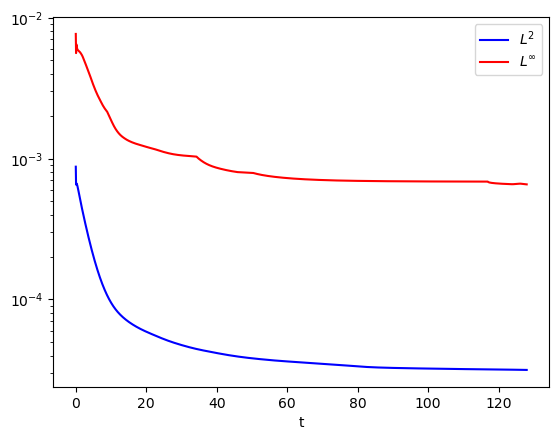

In [30]:
errors_L2 = []   # Liste pour les erreurs L^2
errors_Linf = [] # Liste pour les erreurs L^∞

factor = 5 
indices = np.arange(0, u_fem.shape[0], factor) 

# Sous-échantillonnage
u_fem_reduced = u_fem
u_pinns_reduced = u_pinns

# Domaine d'étude
n_time = u_fem_reduced.shape[0]
time = np.linspace(0, 128, n_time)
for t in range(n_time):
    error_t = u_fem_reduced[t] - u_pinns_reduced[t]
    error_L2_t = np.sqrt(np.sum(error_t**2))
    errors_L2.append(error_L2_t)
    error_Linf_t = np.max(np.abs(error_t))
    errors_Linf.append(error_Linf_t)

errors_L2 = 1e-6/(np.array(errors_L2)/n_time)
errors_Linf = 1e-6/(np.array(errors_Linf)/n_time)


print(f"Erreur moyenne (L2) : {np.mean(errors_L2)*10:.4e}")
print(f"Erreur min (L2) : {np.min(errors_L2)*10:.4e}")
print(f"Erreur max (L2) : {np.max(errors_L2)*10:.4e}")
print(f"Erreur moyenne (L∞) : {np.mean(errors_Linf):.4e}")
print(f"Erreur min (L∞) : {np.min(errors_Linf):.4e}")
print(f"Erreur max (L∞) : {np.max(errors_Linf):.4e}")
# Courbe des erreurs L^2
plt.semilogy(time, errors_L2, label=r'$L^2$', color='b')
plt.xlabel('t')
plt.semilogy(time, errors_Linf, label=r'$L^\infty$', color='r')
plt.legend()
plt.savefig("erreurs_L2_Linf.png", dpi=330)
plt.show()


Erreur relative moyenne (L2) : 3.7573e-02
Erreur relative min (L2) : 3.0767e-02
Erreur relative max (L2) : 5.1715e-01
Erreur relative moyenne (L∞) : 1.4880e-02
Erreur relative min (L∞) : 1.2573e-02
Erreur relative max (L∞) : 8.6515e-02


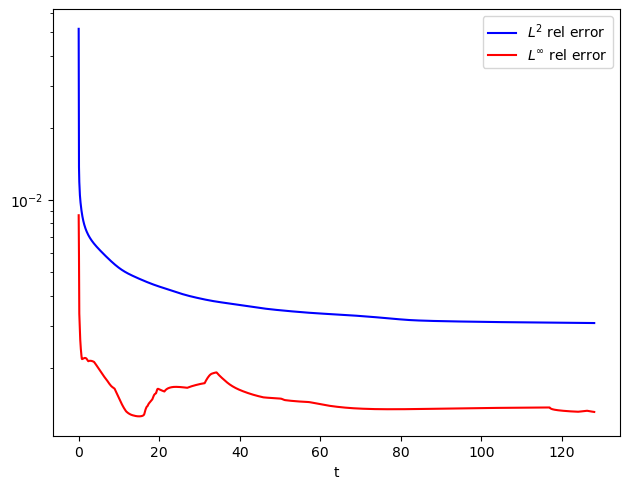

In [29]:
relative_errors_L2 = []
relative_errors_Linf = []

factor = 5 
indices = np.arange(0, u_fem.shape[0], factor) 

# Sous-échantillonnage
u_fem = u_fem
u_pinns = u_pinns

for i in range(u_fem.shape[0]): 
    error_t = u_fem[i] - u_pinns[i]
    # Norme L^2 relative
    norm_fem_L2 = np.sqrt(np.sum(u_fem[i]**2))  # Norme L^2 de la solution de référence
    norm_error_L2 = np.sqrt(np.sum(error_t**2))  # Norme L^2 de l'erreur
    relative_error_L2 = norm_error_L2 / norm_fem_L2  # Erreur relative en norme L^2
    relative_errors_L2.append(relative_error_L2)
    
    # Norme L^∞ relative
    norm_fem_Linf = np.max(np.abs(u_fem[i]))  # Norme L^∞ de la solution de référence
    norm_error_Linf = np.max(np.abs(error_t))  # Norme L^∞ de l'erreur
    relative_error_Linf = norm_error_Linf / norm_fem_Linf  # Erreur relative en norme L^∞
    relative_errors_Linf.append(relative_error_Linf)

# Conversion des listes en tableaux NumPy (optionnel)
relative_errors_L2 = 1e-6/(np.array(relative_errors_L2)/n_time)
relative_errors_Linf = 1e-6/(np.array(relative_errors_Linf)/n_time)

# Affichage des résultats globaux
print(f"Erreur relative moyenne (L2) : {np.mean(relative_errors_L2)*10:.4e}")
print(f"Erreur relative min (L2) : {np.min(relative_errors_L2)*10:.4e}")
print(f"Erreur relative max (L2) : {np.max(relative_errors_L2)*10:.4e}")
print(f"Erreur relative moyenne (L∞) : {np.mean(relative_errors_Linf)*10:.4e}")
print(f"Erreur relative min (L∞) : {np.min(relative_errors_Linf)*10:.4e}")
print(f"Erreur relative max (L∞) : {np.max(relative_errors_Linf)*10:.4e}")


# Génération de l'échelle temporelle
n_time = u_fem.shape[0]
t = np.linspace(0, 128, n_time)

# Courbes
plt.semilogy(t, relative_errors_L2, label=r'$L^2$ rel error', color='b')
plt.semilogy(t, relative_errors_Linf, label=r'$L^\infty$ rel error', color='r')
# plt.xlabel('Time (iterations)')
# plt.ylabel('Relative Error')
# plt.title('Relative Errors between FEM and PINNs')
plt.legend()
# plt.grid()
# plt.xlim(0,128)
plt.tight_layout()
plt.xlabel('t')
plt.savefig("erreurs_L2_Linf_rel.png", dpi=330)

# Affichage du graphique
plt.show()


#### Conditions initiales errors

In [17]:
u_fem_initial = u_fem[0]
u_pinns_initial = u_pinns[0]

# Calcul de l'erreur
error_initial = u_fem_initial - u_pinns_initial

# Norme L^2 de l'erreur
norm_fem_L2_initial = np.sqrt(np.sum(u_fem_initial**2))  # Norme L^2 de la solution de référence
norm_error_L2_initial = np.sqrt(np.sum(error_initial**2))  # Norme L^2 de l'erreur
relative_error_L2_initial = norm_error_L2_initial / norm_fem_L2_initial  # Erreur relative en norme L^2

# Norme L^∞ de l'erreur
norm_fem_Linf_initial = np.max(np.abs(u_fem_initial))  # Norme L^∞ de la solution de référence
norm_error_Linf_initial = np.max(np.abs(error_initial))  # Norme L^∞ de l'erreur
relative_error_Linf_initial = norm_error_Linf_initial / norm_fem_Linf_initial  # Erreur relative en norme L^∞

# Résultats
print(f"Erreur relative en norme L^2 (condition initiale) : {relative_error_L2_initial/n_time:.4e}")
print(f"Erreur relative en norme L^∞ (condition initiale) : {relative_error_Linf_initial/n_time:.4e}")


Erreur relative en norme L^2 (condition initiale) : 1.9337e-05
Erreur relative en norme L^∞ (condition initiale) : 1.1559e-04
